<a href="https://colab.research.google.com/github/M-torki/ECG-Classification/blob/main/MITBIH_BeatClassification_Shayan%20Like.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
cd /gdrive/MyDrive/

/gdrive/MyDrive


In [ ]:
cd mit-bih-arrhythmia-database-1.0.0/

/gdrive/MyDrive/mit-bih-arrhythmia-database-1.0.0


In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import shutil
from IPython.display import display 
import keras
from keras import optimizers, losses, activations, models
from keras.layers import Dense, BatchNormalization, Input, Activation, Dropout, Convolution1D, Conv1D, MaxPool1D , MaxPooling1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, MaxPool2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , Lambda, GaussianNoise
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam , Adadelta , Adagrad , SGD , RMSprop
from keras import regularizers
import keras.backend as K
from random import choice,shuffle
from sklearn.metrics import classification_report
import glob

In [ ]:
ls

100.atr    108.at_  117.at_  200.xws  210.dat  221.atr  234.atr
100.dat    108.atr  117.atr  201.atr  210.hea  221.dat  234.dat
100.hea    108.dat  117.dat  201.dat  210.xws  221.hea  234.hea
100.xws    108.hea  117.hea  201.hea  212.atr  221.xws  234.xws
101.atr    108.xws  117.xws  201.xws  212.dat  222.at_  ANNOTATORS
101.dat    109.atr  118.atr  202.atr  212.hea  222.atr  a_train.txt
101.hea    109.dat  118.dat  202.dat  212.xws  222.dat  A_train.txt
101.xws    109.hea  118.hea  202.hea  213.atr  222.hea  best_model.h5
102-0.atr  109.xws  118.xws  202.xws  213.dat  222.xws  best_modelozal.h5
102.atr    111.atr  119.at_  203.at_  213.hea  223.atr  F_train.txt
102.dat    111.dat  119.atr  203.at-  213.xws  223.dat  J_train.txt
102.hea    111.hea  119.dat  203.atr  214.at_  223.hea  L_train.txt
102.xws    111.xws  119.hea  203.dat  214.atr  223.xws  MIT_BIH_Record_100.csv
103.atr    112.atr  119.xws  203.hea  214.dat  228.atr  MITBIHtest1.csv
103.dat    112.dat  121.atr  203.xws  214.

In [ ]:
mitbih_train = pd.read_csv('MITBIHtrain.csv', index_col=0)
mitbih_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,0.818086,0.720088,0.469979,0.180799,0.124808,0.235863,0.297972,0.303468,0.306970,0.317473,0.322188,0.319168,0.314899,0.309851,0.312460,0.311767,0.302192,0.295963,0.298448,0.298202,0.288458,0.278308,0.278582,0.275777,0.263348,0.251139,0.252048,0.254744,0.235879,0.234208,0.239608,0.247351,0.257140,0.262321,0.279494,0.309420,0.332635,0.349095,0.374995,0.409372,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.765217,0.644483,0.439419,0.185536,0.085592,0.149878,0.199700,0.242059,0.256860,0.274123,0.266035,0.262351,0.255649,0.256589,0.257110,0.250814,0.234590,0.239765,0.238636,0.238302,0.223982,0.224028,0.224095,0.227683,0.214936,0.198021,0.198788,0.190246,0.184369,0.181342,0.191541,0.195507,0.196449,0.196044,0.205828,0.226950,0.239424,0.249830,0.275306,0.327092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.722790,0.640686,0.377531,0.094246,0.059243,0.127640,0.180422,0.229674,0.226784,0.204709,0.204745,0.223617,0.233701,0.221436,0.205175,0.211000,0.209887,0.202663,0.187887,0.192959,0.196398,0.184781,0.173754,0.177264,0.181365,0.171121,0.155346,0.155403,0.166364,0.165779,0.159627,0.161967,0.185365,0.192540,0.199978,0.227725,0.275850,0.312467,0.322820,0.328428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.716367,0.605889,0.334334,0.062152,0.001482,0.074463,0.101657,0.168074,0.192648,0.191673,0.180997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.936186,0.851839,0.522560,0.177218,0.101580,0.226688,0.307603,0.312247,0.302577,0.307154,0.307559,0.323197,0.311100,0.303209,0.318524,0.317493,0.294123,0.284727,0.287552,0.302002,0.290240,0.270584,0.269801,0.272320,0.252298,0.247972,0.239045,0.234538,0.237144,0.223231,0.212339,0.234465,0.244725,0.244923,0.259700,0.296385,0.327229,0.360961,0.398028,0.440913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89756,0.170161,0.175384,0.161912,0.159929,0.167725,0.169953,0.170139,0.173534,0.183595,0.178868,0.170358,0.163676,0.183728,0.176299,0.174333,0.173748,0.192752,0.210310,0.221938,0.224181,0.252555,0.266563,0.270775,0.262857,0.239972,0.216164,0.201028,0.174862,0.165812,0.170751,0.170872,0.162807,0.150584,0.173192,0.332145,0.660377,0.984904,0.950598,0.515910,0.162880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
89757,0.310288,0.313636,0.320426,0.319495,0.310250,0.319191,0.325578,0.325349,0.319269,0.331440,0.344319,0.339334,0.337858,0.336588,0.339555,0.343966,0.337829,0.334111,0.325639,0.329698,0.338193,0.337987,0.340513,0.336636,0.324691,0.333071,0.344326,

In [ ]:
from sklearn.utils import shuffle
mitbih_train = shuffle(mitbih_train)
mitbih_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
26878,0.935985,0.842133,0.473546,0.186018,0.137746,0.138930,0.127318,0.104026,0.101840,0.082046,0.087865,0.074434,0.086959,0.072134,0.085259,0.079273,0.092150,0.093070,0.102789,0.097300,0.107218,0.108489,0.111432,0.126669,0.136846,0.148269,0.169123,0.181570,0.169470,0.162838,0.141424,0.136224,0.107968,0.108801,0.090409,0.089643,0.079201,0.089984,0.077029,0.084495,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13105,0.967233,0.878012,0.402280,0.060938,0.172119,0.188434,0.130522,0.113805,0.116282,0.107117,0.106046,0.107571,0.108185,0.095932,0.094060,0.104185,0.109314,0.096361,0.096120,0.108281,0.112180,0.106981,0.107865,0.122852,0.133649,0.133952,0.139235,0.158439,0.175097,0.184555,0.200881,0.223835,0.256542,0.269402,0.282641,0.307258,0.331073,0.334984,0.341480,0.330833,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10438,0.463060,0.109475,0.204970,0.356478,0.414868,0.439278,0.437991,0.449347,0.450733,0.444644,0.444658,0.464462,0.468619,0.460586,0.466305,0.480281,0.486961,0.472341,0.476656,0.498414,0.498100,0.498007,0.503404,0.535168,0.553982,0.558918,0.560307,0.584156,0.620673,0.631229,0.648432,0.666037,0.704129,0.730006,0.731211,0.741303,0.766630,0.769986,0.739412,0.700190,...,0.411727,0.416191,0.430995,0.4302,0.423227,0.434366,0.453993,0.447743,0.443503,0.44889,0.472568,0.478178,0.474,0.482538,0.506655,0.51003,0.512122,0.544242,0.576943,0.59717,0.614675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52728,0.977729,0.902166,0.564102,0.288439,0.299407,0.320506,0.308991,0.286683,0.280980,0.277720,0.279290,0.275090,0.271983,0.265255,0.269303,0.265659,0.259033,0.250188,0.253965,0.256240,0.253746,0.253816,0.261425,0.259532,0.249936,0.242796,0.241549,0.233174,0.223293,0.209624,0.196912,0.191658,0.179793,0.170359,0.167621,0.170273,0.182256,0.193087,0.214278,0.243328,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
54483,0.952579,0.945340,0.482465,0.050612,0.197038,0.317810,0.307730,0.341331,0.346186,0.335148,0.336413,0.349223,0.347484,0.350330,0.359408,0.360258,0.362118,0.361444,0.367636,0.375447,0.378994,0.377994,0.383384,0.391389,0.395291,0.398449,0.405176,0.410593,0.408320,0.411329,0.415652,0.416092,0.418005,0.410566,0.416360,0.425874,0.429664,0.433053,0.442081,0.456363,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33303,0.000000,0.099437,0.191684,0.341949,0.422334,0.509820,0.606426,0.699757,0.704288,0.715262,0.717268,0.720664,0.719562,0.732993,0.734470,0.729727,0.743724,0.747180,0.760765,0.761321,0.775896,0.773682,0.800414,0.794671,0.820308,0.812232,0.838244,0.833572,0.856194,0.857

In [ ]:
mitbih_test = pd.read_csv('MITBIHtest.csv', index_col=0)
mitbih_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,0.898901,0.365866,0.119414,0.191118,0.181552,0.199433,0.187816,0.184453,0.186707,0.190191,0.178097,0.195146,0.192766,0.182078,0.175505,0.185292,0.184751,0.187362,0.188020,0.183904,0.176712,0.181160,0.190581,0.182722,0.183184,0.176261,0.186954,0.175422,0.187751,0.170345,0.183921,0.169532,0.170581,0.158201,0.172006,0.160252,0.170684,0.163632,0.187762,0.185671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.916503,0.917102,0.439387,0.128241,0.118428,0.149683,0.157387,0.150994,0.157269,0.143460,0.144616,0.147074,0.156461,0.140906,0.147026,0.143310,0.139978,0.136986,0.144952,0.144537,0.148532,0.148671,0.145647,0.154023,0.142038,0.152283,0.135725,0.145436,0.130999,0.136494,0.123359,0.129645,0.111348,0.119866,0.103650,0.112705,0.100051,0.114408,0.118852,0.150043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.626616,0.078349,0.143361,0.144182,0.149653,0.143237,0.147057,0.139515,0.138309,0.137285,0.130809,0.134419,0.134541,0.131312,0.136321,0.140675,0.146366,0.141496,0.143835,0.127826,0.137391,0.128488,0.144688,0.132729,0.147991,0.142868,0.152672,0.137744,0.141330,0.127886,0.137960,0.123181,0.132702,0.127907,0.139360,0.152153,0.181011,0.185007,0.196108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.724917,0.925841,0.340448,0.063178,0.160610,0.134079,0.156437,0.134946,0.151477,0.135368,0.145631,0.136021,0.152237,0.145192,0.148037,0.141005,0.150003,0.152689,0.154716,0.150691,0.155950,0.153019,0.155187,0.156573,0.154304,0.156126,0.159617,0.157090,0.157087,0.159690,0.153042,0.160368,0.155025,0.164455,0.148839,0.164279,0.166476,0.195927,0.193884,0.213307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.808576,0.788044,0.190653,0.098258,0.149267,0.143545,0.132782,0.144616,0.139957,0.152961,0.145420,0.153656,0.133656,0.148766,0.132011,0.143753,0.134510,0.141149,0.132400,0.145588,0.144996,0.148380,0.128242,0.142866,0.141165,0.145535,0.140712,0.140404,0.142225,0.129839,0.123652,0.115944,0.109504,0.114472,0.126316,0.114458,0.133728,0.135339,0.165036,0.168561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22433,0.683369,0.411722,0.449075,0.385808,0.404331,0.369036,0.357278,0.313978,0.288052,0.226511,0.152880,0.077764,0.049958,0.033013,0.041782,0.047675,0.090148,0.141058,0.213274,0.255239,0.318193,0.315649,0.337365,0.336104,0.352339,0.347233,0.382970,0.379104,0.396842,0.394083,0.403831,0.398338,0.414159,0.409609,0.415770,0.409602,0.413180,0.414005,0.416421,0.419894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
22434,0.746623,0.439526,0.394551,0.371400,0.360849,0.335792,0.306598,0.266873,0.227089,0.166971,0.082925,0.030109,0.004249,0.009298,0.005748,0.046379,0.107931,0.187959,0.230381,0.270979,0.280014,0.300249,0.298502,0.305400,0.307416,0.331097,0.338636,

In [ ]:
mitbih_test = shuffle(mitbih_test)
mitbih_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
17307,0.902063,0.651560,0.230743,-1.110223e-16,0.086728,0.187034,0.238501,0.240188,0.252683,0.244775,0.251394,0.249957,0.255061,0.247948,0.254865,0.244935,0.234284,0.222133,0.229628,0.212792,0.206596,0.217809,0.216277,0.193967,0.197060,0.206526,0.201876,0.183226,0.176227,0.183522,0.195231,0.193950,0.194182,0.226037,0.255335,0.268810,0.290429,0.334341,0.399432,0.411227,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
13688,0.955911,0.847215,0.675994,5.084110e-01,0.323792,0.213367,0.154598,0.156696,0.161605,0.182566,0.218045,0.233473,0.255721,0.267596,0.276614,0.274474,0.276957,0.268989,0.274183,0.266041,0.272278,0.264895,0.264802,0.257896,0.258908,0.253003,0.254796,0.255924,0.259518,0.264420,0.272769,0.283034,0.293448,0.309192,0.319838,0.338456,0.349304,0.364187,0.371625,0.388820,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18825,0.714300,0.696257,0.637524,5.442451e-01,0.384212,0.304154,0.318273,0.326972,0.312683,0.304205,0.299533,0.304232,0.298759,0.310256,0.309096,0.317666,0.319972,0.322740,0.308616,0.314282,0.296473,0.305308,0.298253,0.303326,0.294264,0.301219,0.309562,0.314462,0.311467,0.334307,0.347383,0.353472,0.372615,0.377658,0.388003,0.380623,0.377145,0.361919,0.359608,0.353304,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
130,0.912151,0.585726,0.084008,1.105581e-01,0.139240,0.138785,0.140961,0.135692,0.140290,0.147452,0.139483,0.145362,0.139049,0.144113,0.138312,0.144812,0.136587,0.144953,0.131569,0.146088,0.133109,0.144538,0.131368,0.141355,0.138106,0.145380,0.141879,0.145392,0.141298,0.145683,0.131529,0.132611,0.129299,0.133773,0.132555,0.133660,0.145202,0.152531,0.167638,0.170137,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14529,0.867236,0.775690,0.638796,5.717995e-01,0.423177,0.216816,0.075637,0.042724,0.045388,0.055199,0.076201,0.084091,0.104357,0.115904,0.122379,0.117853,0.118363,0.109468,0.111240,0.101795,0.104718,0.095055,0.097383,0.089435,0.095155,0.092381,0.098642,0.101393,0.111872,0.120686,0.131847,0.150068,0.161690,0.180063,0.195737,0.213983,0.231281,0.251243,0.264346,0.283878,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15614,0.941660,0.817285,0.652893,5.066677e-01,0.337468,0.266894,0.276029,0.330846,0.362408,0.354365,0.373249,0.372422,0.391874,0.386638,0.393038,0.376934,0.399137,0.390054,0.409913,0.399023,0.433934,0.434607,0.470379,0.468931,0.505756,0.506710,0.544678,0.557948,0.586134,0.605935,0.632933,0.655208,0.677461,0.695571,0.697172,0.695058,0.640451,0.607653,0.547121,0.528291,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3772,1.000000,0.597719,0.393628,2.861451e-01,0.202043,0.170536,0.123925,0.122211,0.112

##balancing data

In [ ]:
from sklearn.utils import resample
df_1=mitbih_train[mitbih_train['186']==1]
df_2=mitbih_train[mitbih_train['186']==2]
df_3=mitbih_train[mitbih_train['186']==3]
df_4=mitbih_train[mitbih_train['186']==4]
df_0=(mitbih_train[mitbih_train['186']==0]).sample(n=10000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=10000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=10000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=10000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=10000,random_state=126)

mitbih_train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])



In [ ]:
mitbih_test.iloc[:,-1]

17307    0
13688    0
18825    2
130      0
14529    0
        ..
15614    0
3772     0
21833    4
751      0
6926     0
Name: 186, Length: 22438, dtype: int64

In [ ]:
print(mitbih_test.shape , mitbih_train.shape)

(22438, 187) (50000, 187)


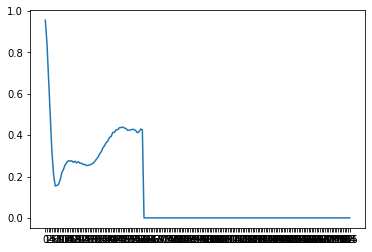

In [ ]:
plt.plot(mitbih_test.iloc[1,:-1])

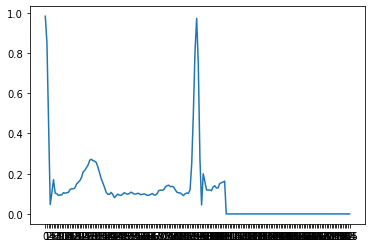

In [ ]:
plt.plot(mitbih_train.iloc[1,:-1])

In [ ]:
mitbih_test.iloc[:,-1].value_counts()

0    18054
4     2230
2     1442
1      552
3      160
Name: 186, dtype: int64

In [ ]:
mitbih_train.iloc[:,-1].value_counts()

4    10000
3    10000
2    10000
1    10000
0    10000
Name: 186, dtype: int64

In [ ]:
mitbih_test = mitbih_test.sample(frac=1).reset_index(drop=True)
mitbih_train = mitbih_train.sample(frac=1).reset_index(drop=True)

In [ ]:
x_train = mitbih_train.iloc[: , :-1]
x_test = mitbih_test.iloc[: , :-1]

In [ ]:
y_train = mitbih_train.iloc[: , -1]
y_test =  mitbih_test.iloc[: , -1]

In [ ]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(50000, 186) (22438, 186)
(50000,) (22438,)


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5, dtype='float32')
y_test = to_categorical(y_test, num_classes=5, dtype='float32')

print(y_train.shape , y_test.shape)

(50000, 5) (22438, 5)


In [ ]:
x_train = np.expand_dims(x_train , -1)
x_test = np.expand_dims(x_test , -1)

print(x_test.shape , x_train.shape)

(22438, 186, 1) (50000, 186, 1)


In [ ]:
print(y_test.shape , y_train.shape)

(22438, 5) (50000, 5)


##network

In [ ]:
m = Sequential()

m.add(GaussianNoise(0.1))

m.add(Conv1D(16,
                input_shape=[186, 1],
                kernel_size=80,
                strides=2,
                padding='same',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=2, strides=None))

m.add(Conv1D(32,
                kernel_size=3,
                strides=1,
                padding='same',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=2, strides=None))

m.add(Conv1D(64,
                kernel_size=3,
                strides=1,
                padding='same',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=2, strides=None))

m.add(Conv1D(96,
                kernel_size=3,
                strides=1,
                padding='same',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=2, strides=None))

m.add(Conv1D(96*2,
                kernel_size=3,
                strides=1,
                padding='same',
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(l=0.0001)))
m.add(BatchNormalization())
m.add(Activation('relu'))
m.add(MaxPooling1D(pool_size=2, strides=None))

m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer

m.add(Flatten())
m.add(Dense(32, activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(16, activation='relu'))

m.add(Dropout(0.5))
m.add(Dense(5, activation='softmax'))

In [ ]:
m.build(input_shape=(None, 186, 1))

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise (GaussianNois (None, 186, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 93, 16)            1296      
_________________________________________________________________
batch_normalization (BatchNo (None, 93, 16)            64        
_________________________________________________________________
activation (Activation)      (None, 93, 16)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 46, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 32)            1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 32)            1

In [ ]:
m.compile(optimizer=Adam(learning_rate=1e-3),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


##confusion matrix plotter

In [ ]:
def conf_plotter(y_true, y_pred, classes,
                normalize=0,
                title=None,
                cmap=plt.cm.pink_r,
                mode = 'train',
                save = 0,
                name = 'conf.jpg'):
  # if not title:
  #     if mode == 'train':
  #         title = 'Normalized confusion matrix on train dataset'
  #     if mode == 'test':
  #         title = 'Normalized confusion matrix on test dataset'
  #     if mode == 'prob':
  #         title = 'Normalized confusion matrix on Non-Overlapping test dataset'
          

  from sklearn.metrics import confusion_matrix
  
  cm = confusion_matrix(y_true, y_pred)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  fig, ax = plt.subplots(figsize=(4,4))
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
  ax.set(xticks=np.arange(cm.shape[0]),
        yticks=np.arange(cm.shape[1]),
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel= 'True label',
        xlabel='Predicted label')
  
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                  
      item.set_fontsize(8)
  
  for item in (ax.get_xticklabels() + ax.get_yticklabels()):
      
      item.set_fontsize(8)

      
              
  plt.gca().invert_yaxis()
  plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
          rotation_mode="anchor")

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")
  fig.tight_layout()
  if save == 1:
      plt.savefig(name)
  return ax

In [ ]:
batch_size = 128

m.fit(x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=20,
        verbose=1,
        #validation_split = 0.2,
)

Epoch 1/20
391/391 [==============================] - 23s 54ms/step - loss: 1.4100 - accuracy: 0.4360
Epoch 2/20
391/391 [==============================] - 21s 54ms/step - loss: 0.8750 - accuracy: 0.6988
Epoch 3/20
391/391 [==============================] - 21s 53ms/step - loss: 0.7517 - accuracy: 0.7540
Epoch 4/20
391/391 [==============================] - 21s 53ms/step - loss: 0.6808 - accuracy: 0.7775
Epoch 5/20
391/391 [==============================] - 21s 53ms/step - loss: 0.6577 - accuracy: 0.7908
Epoch 6/20
391/391 [==============================] - 21s 53ms/step - loss: 0.6227 - accuracy: 0.8049
Epoch 7/20
391/391 [==============================] - 21s 54ms/step - loss: 0.5864 - accuracy: 0.8207
Epoch 8/20
391/391 [==============================] - 21s 53ms/step - loss: 0.5815 - accuracy: 0.8229
Epoch 9/20
391/391 [==============================] - 21s 53ms/step - loss: 0.5705 - accuracy: 0.8275
Epoch 10/20
391/391 [==============================] - 21s 53ms/step - loss: 0.558

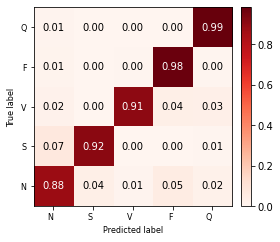

In [ ]:
pred = m.predict(x_train)
pr = [np.argmax(pred[i]) for i in range(len(y_train))]
Y = [np.argmax(y_train[i]) for i in range(len(y_train))]

conf_plotter(Y , pr , ['N', 'S', 'V', 'F', 'Q' ] , normalize=1, cmap = plt.cm.Reds ,mode='train', save=0 , name='RawData_Deep_physionet.png')

##classification report

{'F': {'f1-score': 0.16262295081967212,
  'precision': 0.09084249084249084,
  'recall': 0.775,
  'support': 160},
 'N': {'f1-score': 0.8825465857267977,
  'precision': 0.9703792256093511,
  'recall': 0.8092943392046084,
  'support': 18054},
 'Q': {'f1-score': 0.5590994371482176,
  'precision': 0.4806451612903226,
  'recall': 0.6681614349775785,
  'support': 2230},
 'S': {'f1-score': 0.13096559378468367,
  'precision': 0.16905444126074498,
  'recall': 0.1068840579710145,
  'support': 552},
 'V': {'f1-score': 0.5527562983287603,
  'precision': 0.43163225555122714,
  'recall': 0.768377253814147,
  'support': 1442},
 'accuracy': 0.7751136464925573,
 'macro avg': {'f1-score': 0.4575981731616263,
  'precision': 0.42851071491082726,
  'recall': 0.6255434171934697,
  'support': 22438},
 'weighted avg': {'f1-score': 0.8055831654177064,
  'precision': 0.8610986634924789,
  'recall': 0.7751136464925573,
  'support': 22438}}

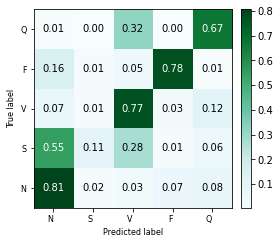

In [ ]:
pred = m.predict(x_test)
pr = [np.argmax(pred[i]) for i in range(len(y_test))]
Y = [np.argmax(y_test[i]) for i in range(len(y_test))]

conf_plotter(Y , pr , ['N', 'S', 'V', 'F', 'Q' ] , normalize=1, cmap = plt.cm.BuGn ,mode='test', save=0 , name='RawData_Deep_physionet.png')
classification_report(Y, pr, labels = [0, 1, 2, 3, 4], target_names=['N', 'S', 'V', 'F', 'Q' ],
                      output_dict = True)

##saving the model

In [ ]:
'''
# serialize model to JSON
model_json = model.to_json()
with open("shayanmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("shayanmodel.h5")
print("Saved model to disk")
'''

'\n# serialize model to JSON\nmodel_json = model.to_json()\nwith open("shayanmodel.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nmodel.save_weights("shayanmodel.h5")\nprint("Saved model to disk")\n'